In [360]:
"""
This Jupyter notebook walks through each part of the prepare_wine_data function to demonstrate each part of the process.
"""

'\nThis Jupyter notebook walks through each part of the prepare_wine_data function to demonstrate each part of the process.\n'

In [361]:
import importlib
import wine
importlib.reload(wine)
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from scipy.stats import describe

from IPython.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

In [362]:
"""
Step 1: Load the dataset
"""
wine_dataset = wine.load_wine_dataset()

In [363]:
# Some basic stats on the dataset
print(wine_dataset.describe())

           alcohol    chlorides  citric acid      density  fixed acidity  \
count  4898.000000  4898.000000  4898.000000  4898.000000    4898.000000   
mean     10.514268     0.045772     0.334192     0.994027       6.854788   
std       1.230621     0.021848     0.121020     0.002991       0.843868   
min       8.000000     0.009000     0.000000     0.987110       3.800000   
25%       9.500000     0.036000     0.270000     0.991723       6.300000   
50%      10.400000     0.043000     0.320000     0.993740       6.800000   
75%      11.400000     0.050000     0.390000     0.996100       7.300000   
max      14.200000     0.346000     1.660000     1.038980      14.200000   

       free sulfur dioxide           pH  residual sugar    sulphates  \
count          4898.000000  4898.000000     4898.000000  4898.000000   
mean             35.308086     3.188267        6.391415     0.489847   
std              17.007137     0.151001        5.072058     0.114126   
min               2.000000 

In [364]:
# The dataset types
print(wine_dataset.info())

<class 'tensorflow_datasets.core.as_dataframe.StyledDataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               4898 non-null   float32
 1   chlorides             4898 non-null   float32
 2   citric acid           4898 non-null   float32
 3   density               4898 non-null   float32
 4   fixed acidity         4898 non-null   float32
 5   free sulfur dioxide   4898 non-null   float32
 6   pH                    4898 non-null   float32
 7   residual sugar        4898 non-null   float32
 8   sulphates             4898 non-null   float64
 9   total sulfur dioxide  4898 non-null   float32
 10  volatile acidity      4898 non-null   float32
 11  quality               4898 non-null   int32  
dtypes: float32(10), float64(1), int32(1)
memory usage: 248.9 KB
None


In [365]:
# Check for null values. All good
print(wine_dataset.isnull().sum())

alcohol                 0
chlorides               0
citric acid             0
density                 0
fixed acidity           0
free sulfur dioxide     0
pH                      0
residual sugar          0
sulphates               0
total sulfur dioxide    0
volatile acidity        0
quality                 0
dtype: int64


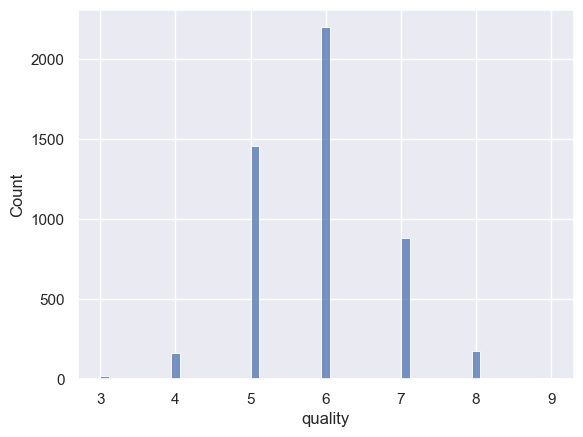

In [366]:
# Check the quality distribution. Clearly, we will need to oversample or use a subset
sns.histplot(wine_dataset["quality"])
plt.show()

In [367]:
# Check correlations. Free sulfur dioxide and residual sugar seem problematic
plt.figure(figsize=(12, 8))
sns.heatmap(wine_dataset.corr(), annot=True)
plt.show()

In [368]:
"""
Step 2: Remove correlated features
"""
wine.drop_wine_correlated_features(wine_dataset)

In [369]:
# Much better now. No correlations greater than 0.5
plt.figure(figsize=(12, 8))
sns.heatmap(wine_dataset.corr(), annot=True)
plt.show()

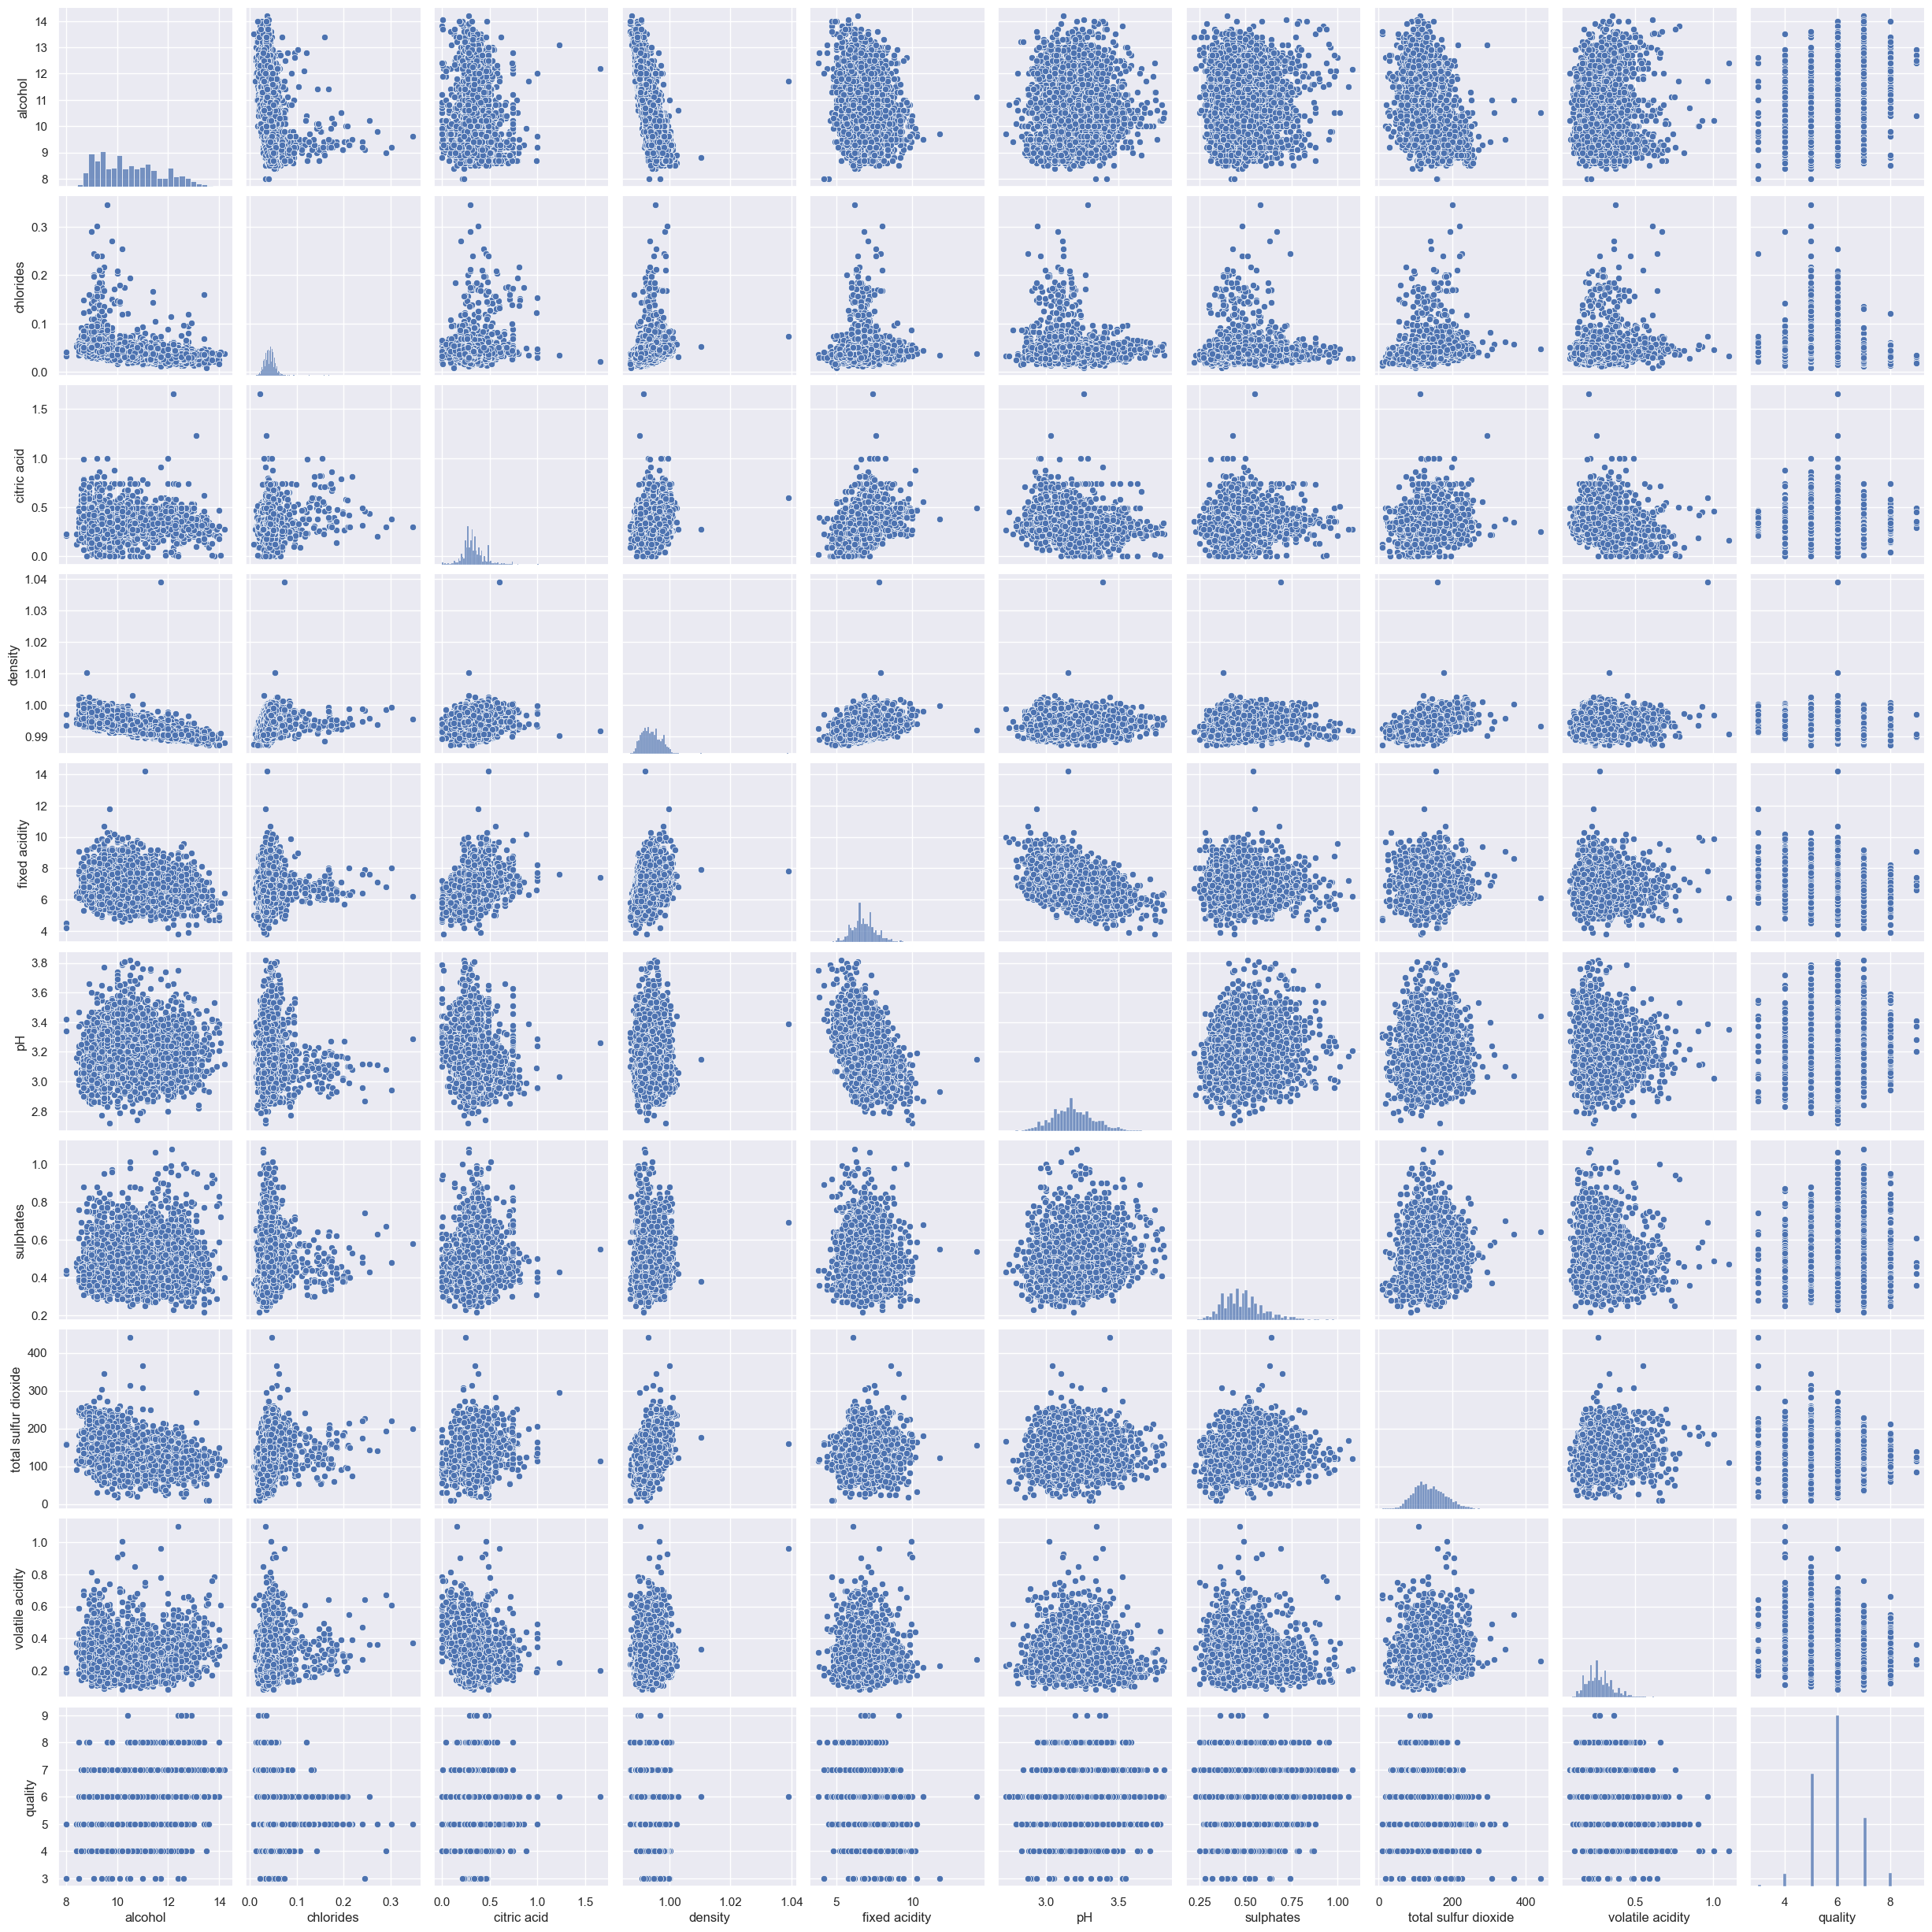

In [370]:
# Clearly, we have a bunch of outliers too
sns.set()
sns.pairplot(wine_dataset)
plt.show()

In [371]:
"""
Step 3: Remove outliers
"""
wine.drop_wine_outliers(wine_dataset)

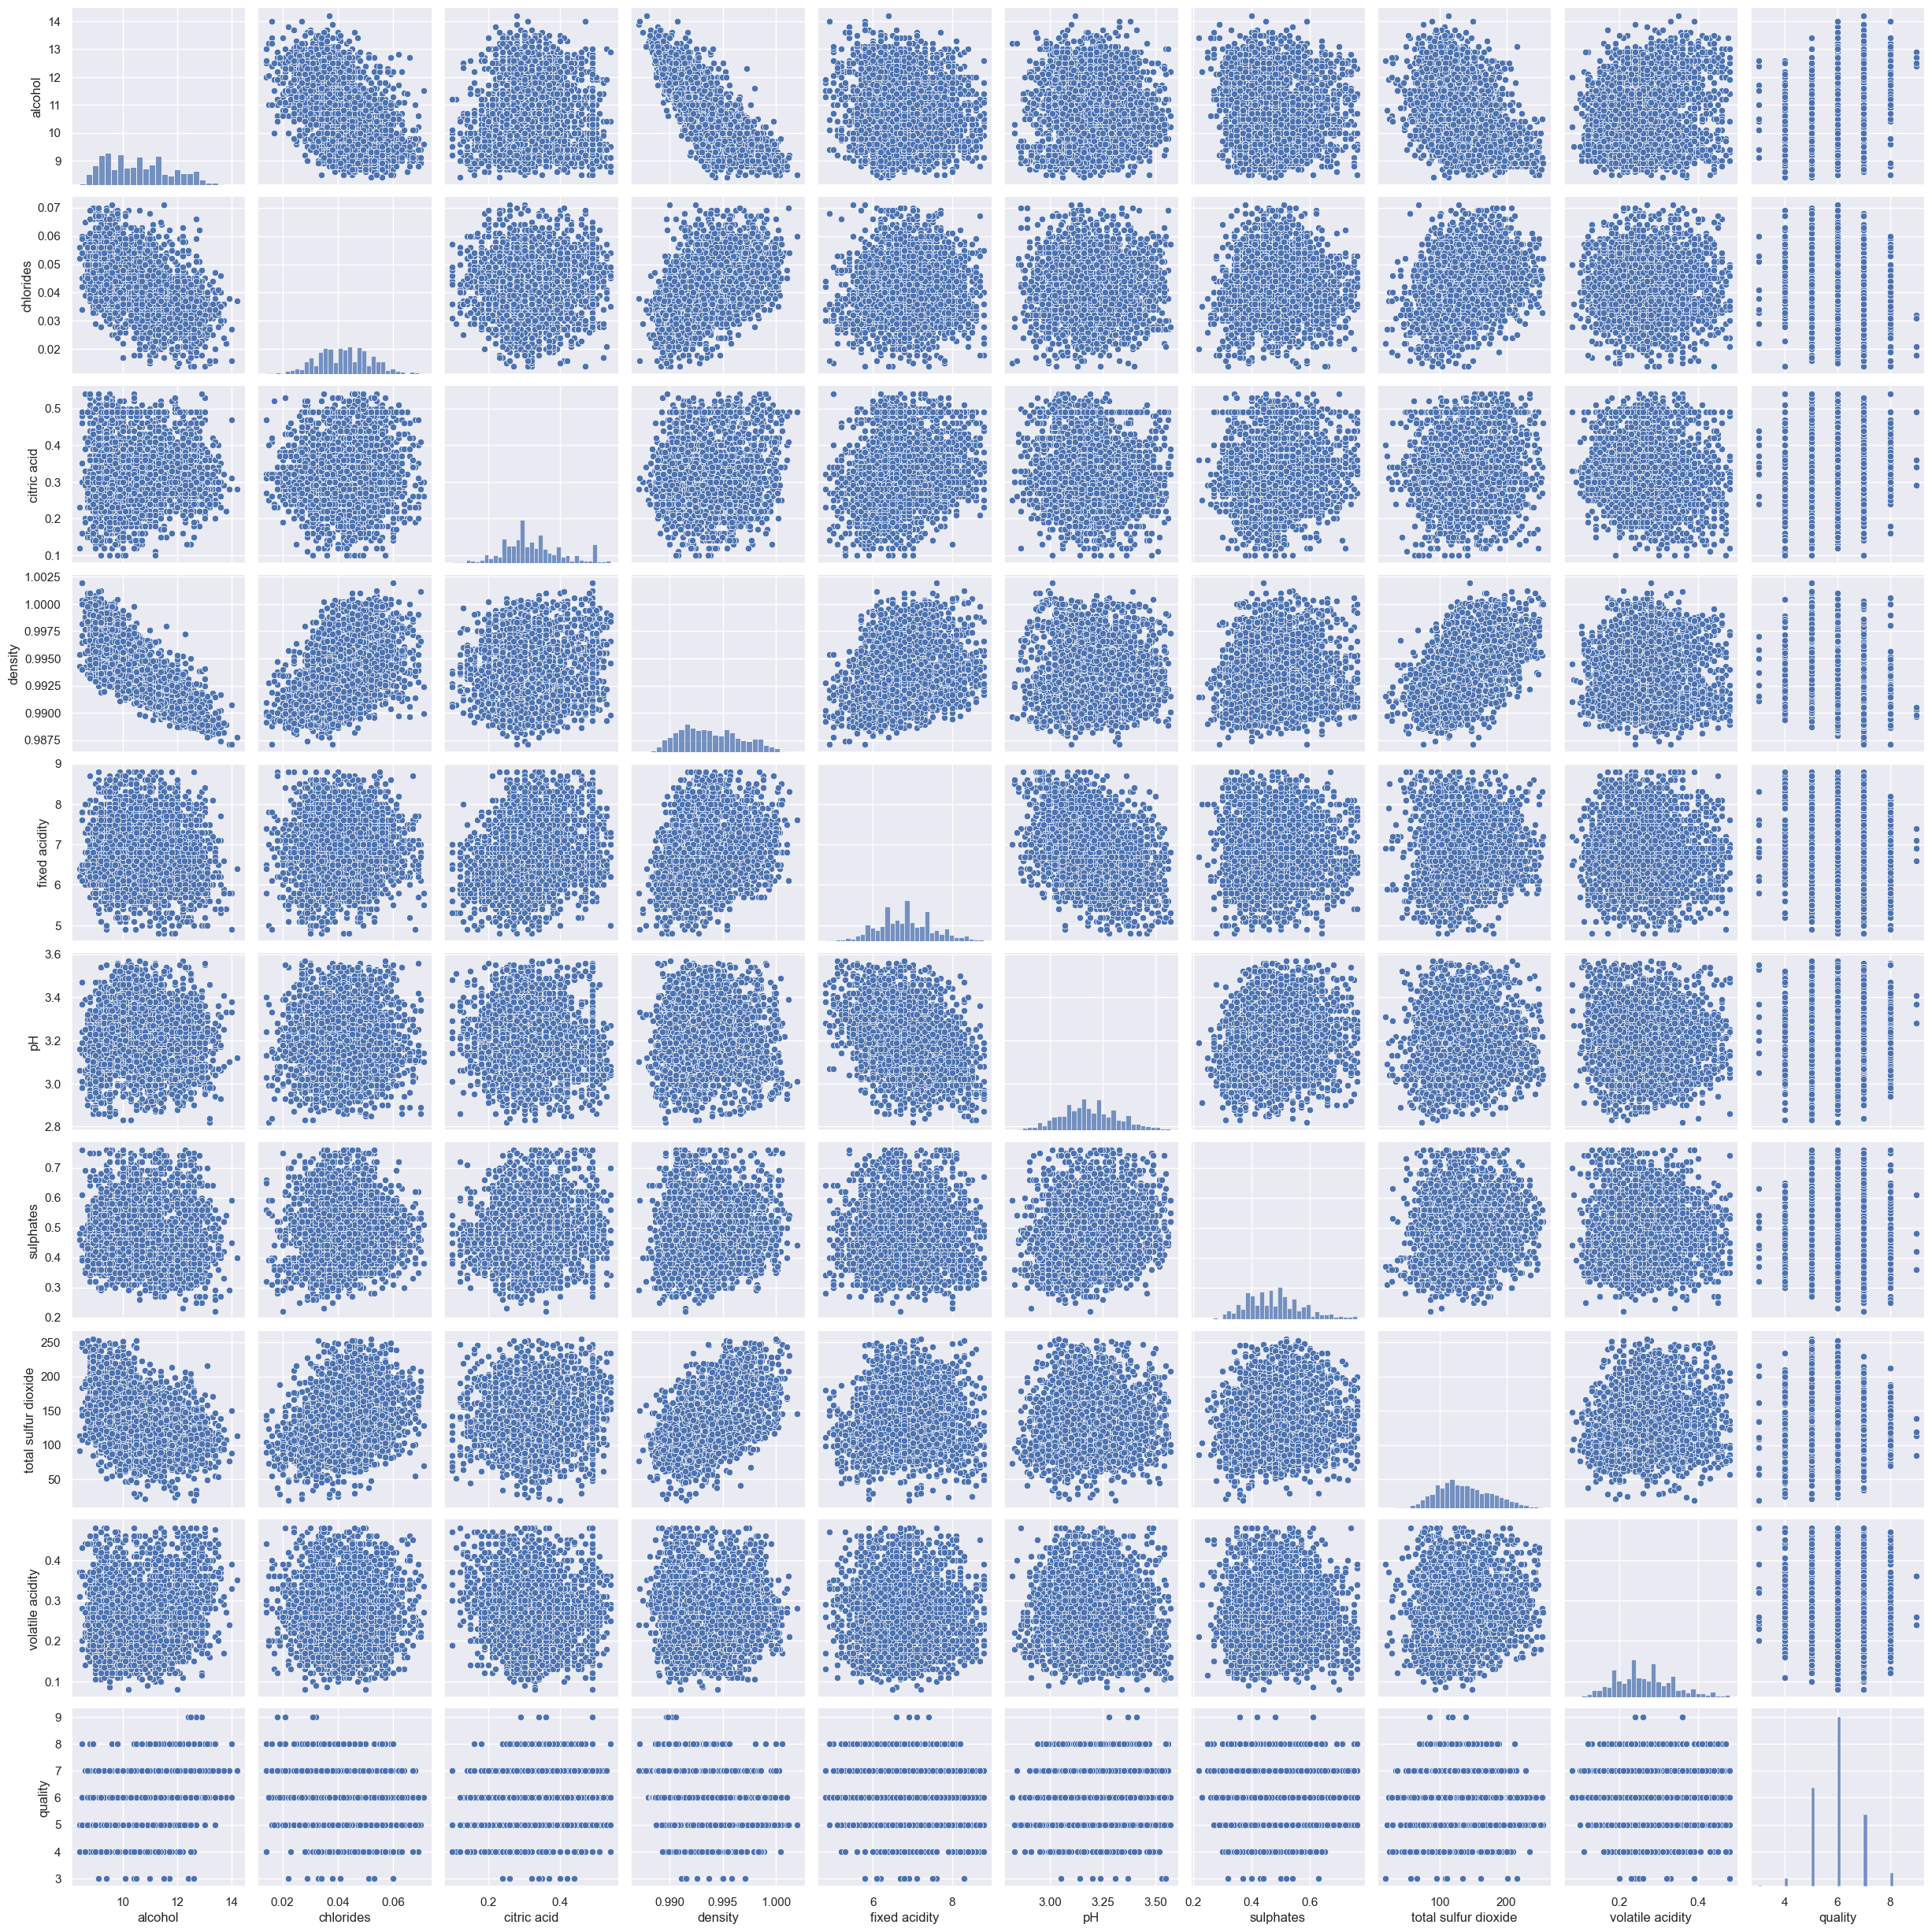

In [372]:
# Much better now 
sns.set()
sns.pairplot(wine_dataset)
plt.show()

In [373]:
"""
Step 4: Balance the dataset
"""
balanced_wine_dataset = wine.balance_wine_dataset(wine_dataset, {5, 6, 7})

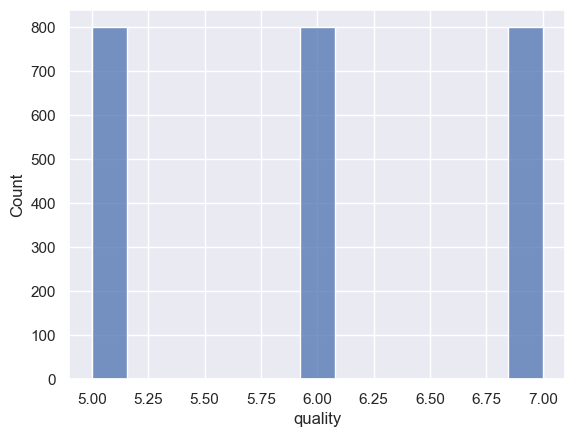

In [374]:
# Now, the dataset is balanced
sns.histplot(balanced_wine_dataset["quality"])
plt.show()

In [375]:
# Check distributions. We have some skews
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()
for col, value in balanced_wine_dataset.items():
    if col != "type":
        sns.histplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

for feature in balanced_wine_dataset.columns:
    print(f"{feature} : {describe(test_dataset[feature], axis=0)}")

alcohol : DescribeResult(nobs=2192, minmax=(8.4, 14.0), mean=10.257616, variance=1.129828663298878, skewness=0.6753154532682281, kurtosis=-0.2918069426780763)
chlorides : DescribeResult(nobs=2192, minmax=(0.015, 0.07), mean=0.04408805, variance=8.715929223130156e-05, skewness=-0.07267385374849826, kurtosis=-0.006053507467351338)
citric acid : DescribeResult(nobs=2192, minmax=(0.1, 0.54), mean=0.3220073, variance=0.008257401970247873, skewness=0.2873369363847458, kurtosis=-0.3273370101648889)
density : DescribeResult(nobs=2192, minmax=(0.98794, 1.00196), mean=0.9944567, variance=7.591425741781255e-06, skewness=0.1278018314886044, kurtosis=-0.7707799973936735)
fixed acidity : DescribeResult(nobs=2192, minmax=(4.8, 8.8), mean=6.8222175, variance=0.5379931755884224, skewness=0.1768891736965996, kurtosis=-0.2231801594398104)
pH : DescribeResult(nobs=2192, minmax=(2.82, 3.57), mean=3.1832619, variance=0.01774056827788046, skewness=0.2372648702008306, kurtosis=0.022897119728311655)
sulphates 

In [376]:
"""
Step 5: Remove skews
"""
wine.eliminate_skews(balanced_wine_dataset)

In [377]:
# Better now
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()
for col, value in balanced_wine_dataset.items():
    if col != "type":
        sns.histplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

for feature in balanced_wine_dataset.columns:
    print(f"{feature} : {describe(test_dataset[feature], axis=0)}")

alcohol : DescribeResult(nobs=2192, minmax=(8.4, 14.0), mean=10.257616, variance=1.129828663298878, skewness=0.6753154532682281, kurtosis=-0.2918069426780763)
chlorides : DescribeResult(nobs=2192, minmax=(0.015, 0.07), mean=0.04408805, variance=8.715929223130156e-05, skewness=-0.07267385374849826, kurtosis=-0.006053507467351338)
citric acid : DescribeResult(nobs=2192, minmax=(0.1, 0.54), mean=0.3220073, variance=0.008257401970247873, skewness=0.2873369363847458, kurtosis=-0.3273370101648889)
density : DescribeResult(nobs=2192, minmax=(0.98794, 1.00196), mean=0.9944567, variance=7.591425741781255e-06, skewness=0.1278018314886044, kurtosis=-0.7707799973936735)
fixed acidity : DescribeResult(nobs=2192, minmax=(4.8, 8.8), mean=6.8222175, variance=0.5379931755884224, skewness=0.1768891736965996, kurtosis=-0.2231801594398104)
pH : DescribeResult(nobs=2192, minmax=(2.82, 3.57), mean=3.1832619, variance=0.01774056827788046, skewness=0.2372648702008306, kurtosis=0.022897119728311655)
sulphates 

In [386]:
"""
Step 6: Prepare xy data
"""
X, Y = wine.prepare_xy_data(balanced_wine_dataset)

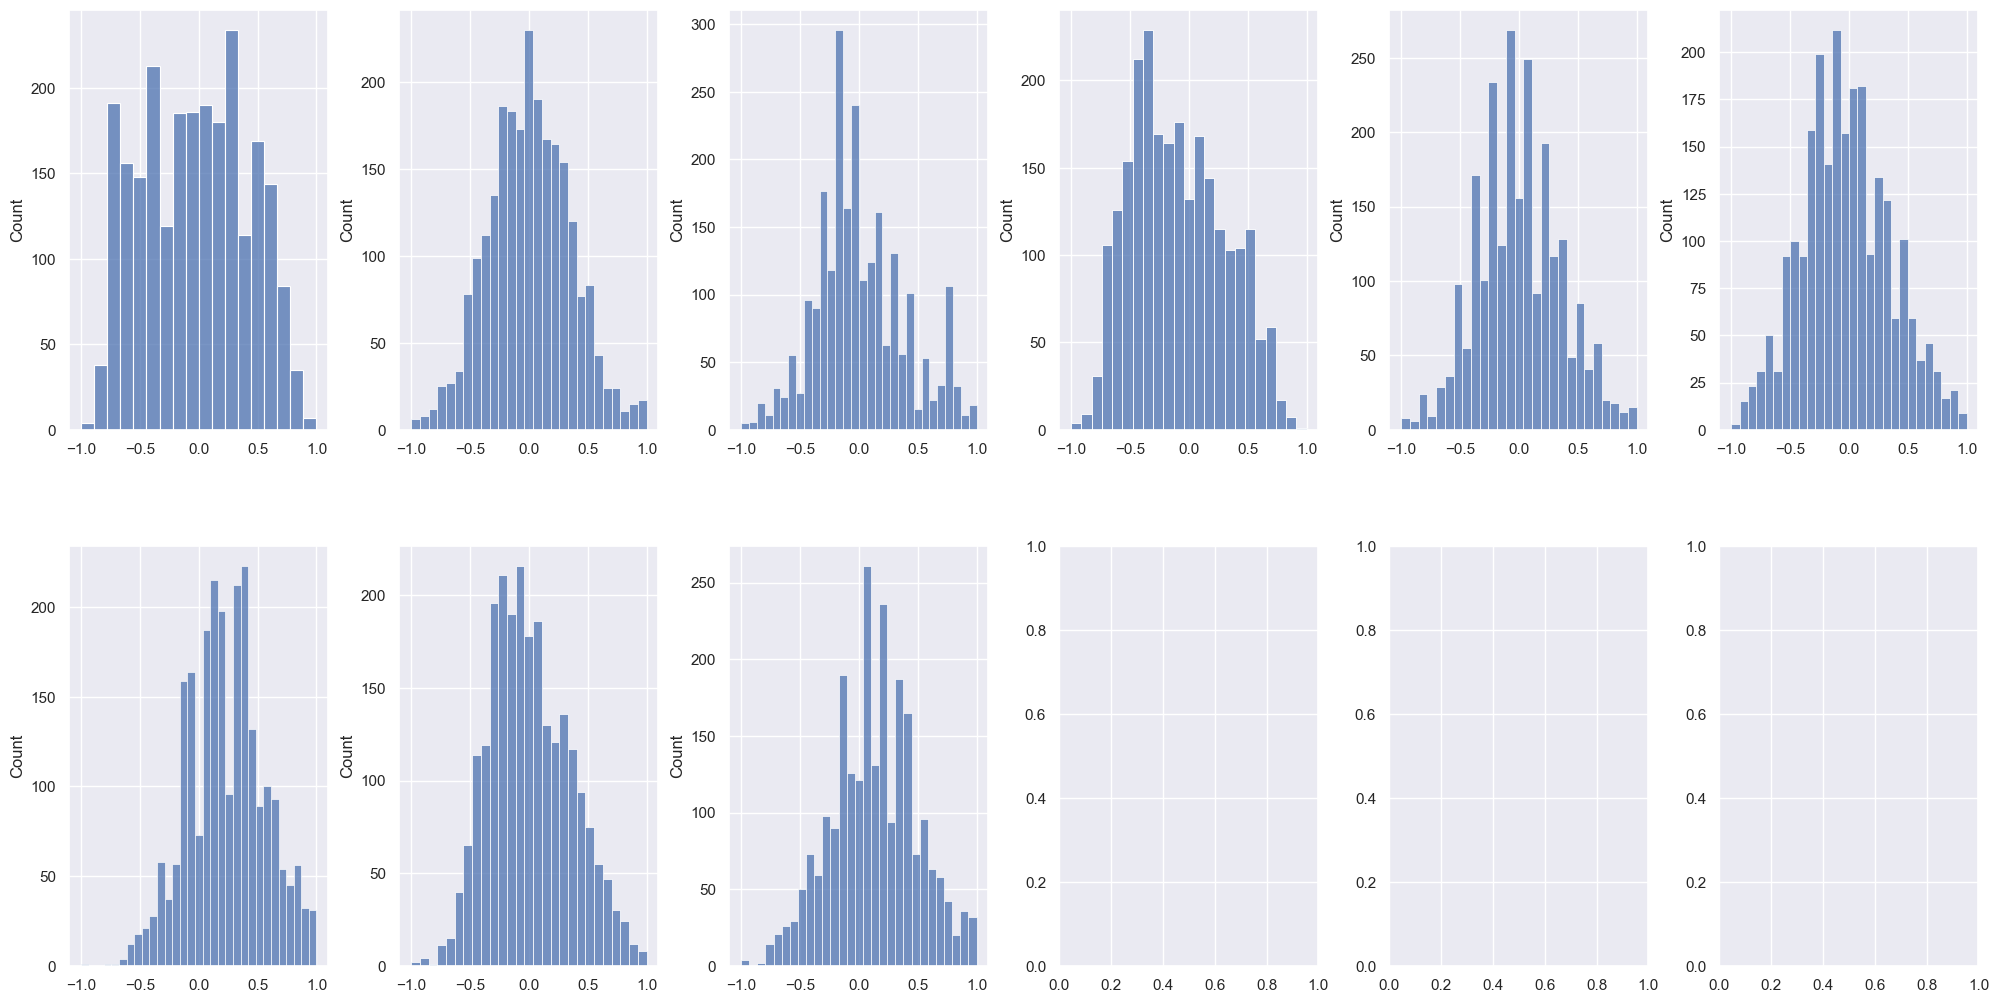

In [387]:
# Now, we have everything in the nice [-1, 1] range
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for i in range(len(X[0])):
    sns.histplot(X[:, i], ax=ax[i])
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [388]:
"""
Step 7: Split data into train, test, validate
"""
train_data, test_data, validate_data = wine.split_data(X, Y, 0.7, 0.15, 0.15)

In [389]:
"""
All together: this function below does everything from the above in a single step
"""
# train_data, test_data, validate_data = wine.prepare_wine_dataset({5, 6, 7}, 40)

'\nAll together: this function below does everything from the above in a single step\n'

3


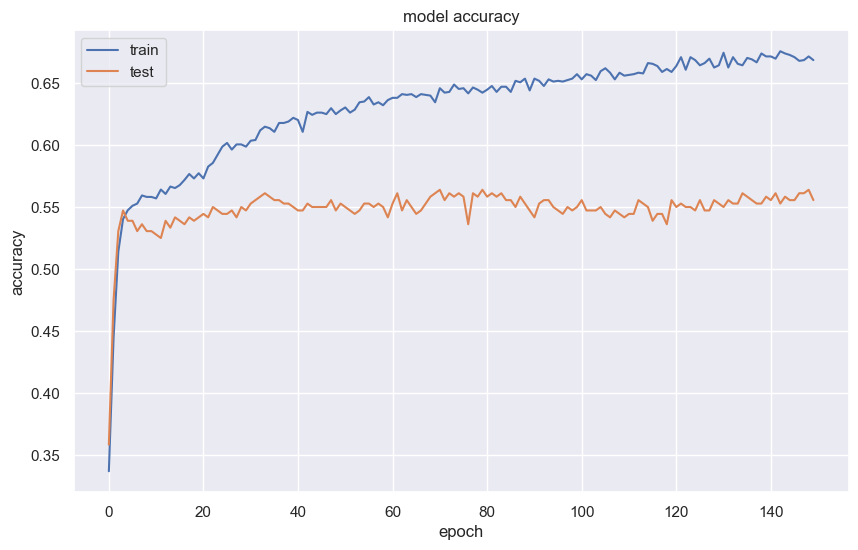

In [390]:
final_layer_size = len(train_data[1][0])
tf.keras.utils.set_random_seed(5)


class Net(tf.keras.Model):
    def __init__(self):
        super(Net, self).__init__()

        self.base_model = keras.models.Sequential(
            [
                layers.Dense(
                    20,
                    input_dim=9,
                    activation="relu",
                    bias_constraint=lambda t: tf.clip_by_value(t, -1.0, 1.0),
                    kernel_constraint=lambda t: tf.clip_by_value(t, -1.0, 1.0),
                ),
                layers.Dense(
                    10,
                    activation="relu",
                    bias_constraint=lambda t: tf.clip_by_value(t, -1.0, 1.0),
                    kernel_constraint=lambda t: tf.clip_by_value(t, -1.0, 1.0),
                ),
            ]
        )

        self.final_layer = layers.Dense(final_layer_size, activation="softmax")

    def call(self, inputs):
        x = self.base_model(inputs)
        x = self.final_layer(x)
        return x


model = Net()
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(
    *train_data, epochs=150, batch_size=36, verbose=0, validation_data=test_data
)

fig = plt.figure(figsize=(10, 6))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

12/12 [==============================] - 0s 677us/step


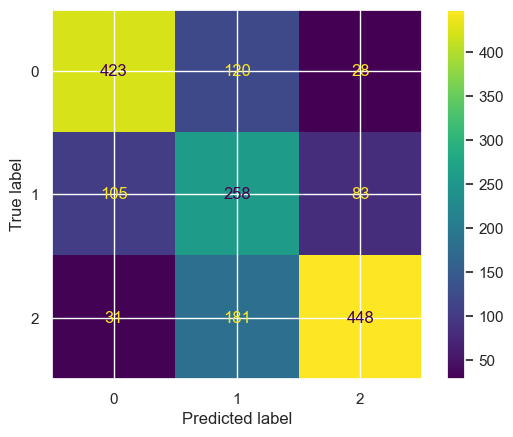

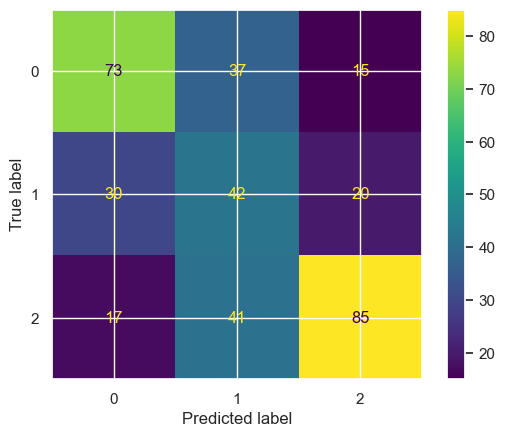

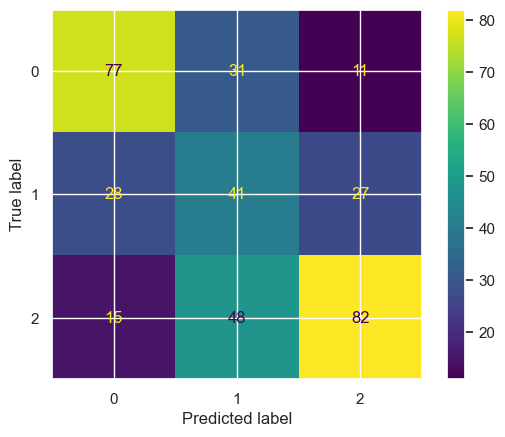

In [391]:
# Test Data
def plot_confusion_matrix(x, y):
    y_pred = model.predict(x)
    x = metrics.ConfusionMatrixDisplay.from_predictions(
        np.argmax(y_pred, axis=1), np.argmax(y, axis=1)
    )
    plt.plot()


plot_confusion_matrix(*train_data)
plot_confusion_matrix(*test_data)
plot_confusion_matrix(*validate_data)